In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


**Fuel dataset**

---

In [ ]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [ ]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)



```
# This is formatted as code
```

**1 -Is bigger engine displacement "displ" guarantees a higher overall fuel_eff "comb" or not?**

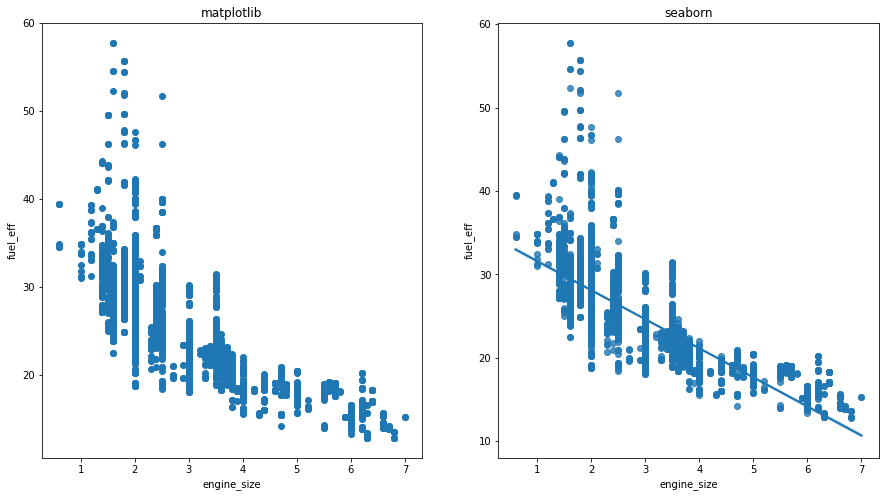

In [ ]:
#scatter plot
fig,ax = plt.subplots(1,2,figsize=(15,8))
ax[0].scatter(data = fuel_econ,x='displ',y = 'comb');
sb.regplot(data = fuel_econ,x='displ',y = 'comb',ax=ax[1]);
ax[1].set_title('seaborn');
ax[0].set_title('matplotlib');
ax[0].set_ylabel('fuel_eff')
ax[0].set_xlabel('engine_size')
plt.ylabel('fuel_eff');
plt.xlabel('engine_size');



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


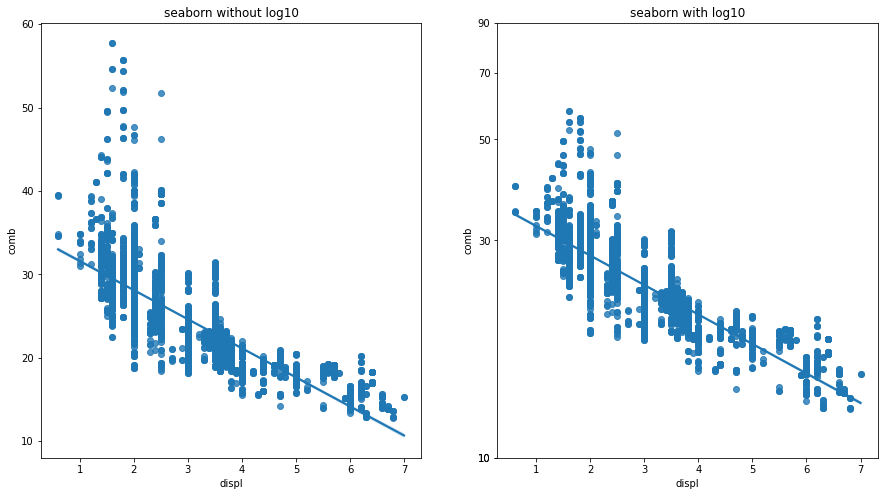

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sb.regplot(data = fuel_econ,x='displ',y = 'comb',ax=ax[0]);
ax[0].set_title('seaborn without log10');
sb.regplot(fuel_econ.displ, fuel_econ.comb.apply(log_trans),ax=ax[1]);
ax[1].set_title('seaborn with log10');
tick_locs = [10, 30, 50, 70, 90, 10]
plt.yticks(log_trans(tick_locs), tick_locs);
ax[0].set_ylabel('fuel_eff')
ax[0].set_xlabel('engine_size')
plt.ylabel('fuel_eff');
plt.xlabel('engine_size');

**answer1 :** we can see frem the scatterr plot that there is a nigative corelation between the size of the engine and the overall fuel miles if the displacement of the engine is high then it will consume asmall amount of fuel and its better if we take the corelation between the log10 of the size of the engine and the overall fuel miles

**3- How does the engine size relate to a car's CO2 footprint?**

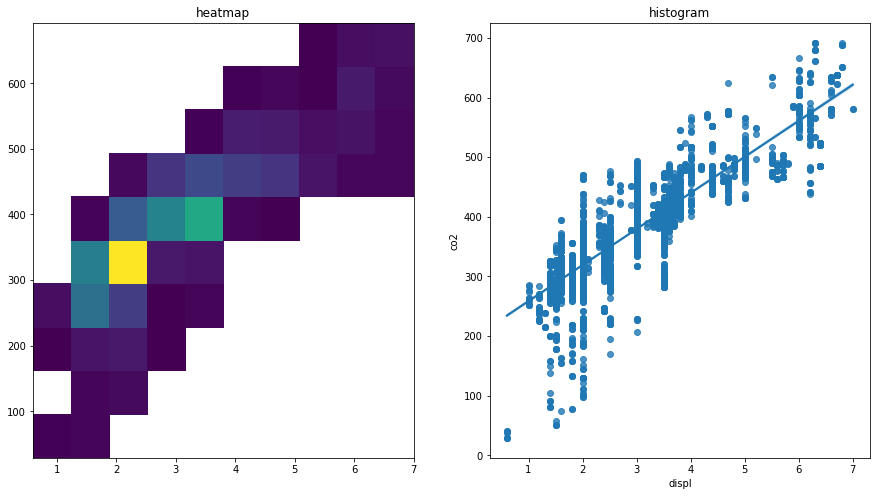

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
ax[0].hist2d(data = fuel_econ,x='displ',y = 'co2',cmin = 0.2);
ax[0].set_title('heatmap');
sb.regplot(data = fuel_econ,x='displ',y = 'co2',ax=ax[1]);
ax[1].set_title('histogram');


**answer3:** we can see from the heatmap or from the histogram that it is a positive relationship so if the engin size is big it has a high co2 footprint

** **
**4 - What is  the relationshipe the engine size and fuel_eff have with co2 `**




---



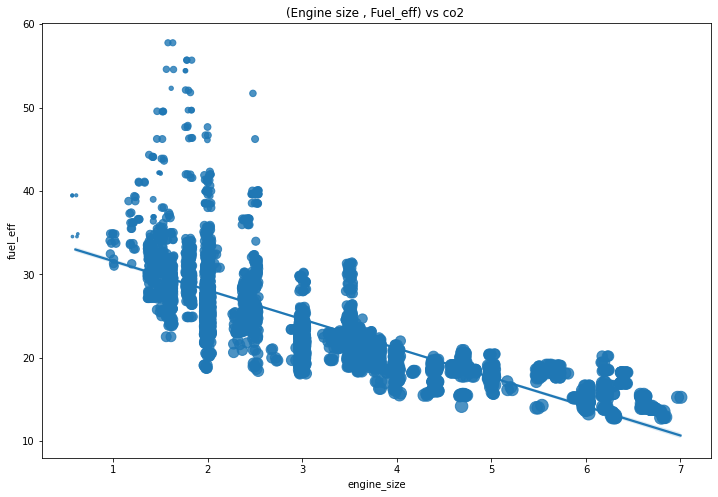

In [ ]:
plt.figure(figsize=(12, 8))
sb.regplot(data = fuel_econ,x='displ',y = 'comb',x_jitter=0.04,scatter_kws = {'s' : fuel_econ['co2']/4 });
plt.title('(Engine size , Fuel_eff) vs co2 ');
plt.ylabel('fuel_eff');
plt.xlabel('engine_size');

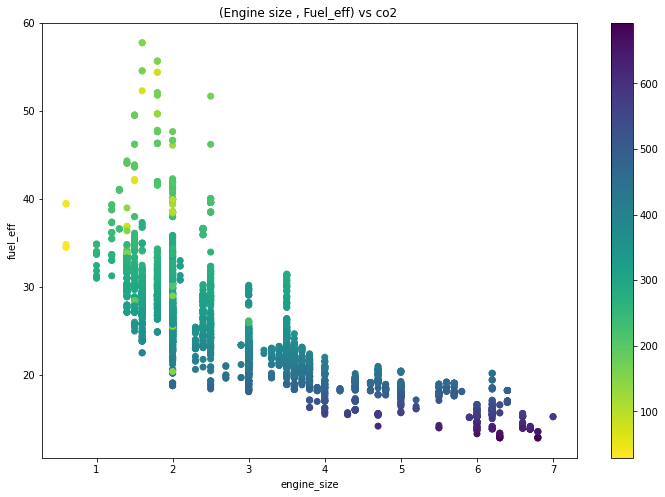

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(data=fuel_econ,x='displ',y='comb',c = 'co2',cmap='viridis_r')
plt.colorbar()
plt.title('(Engine size , Fuel_eff) vs co2 ');
plt.ylabel('fuel_eff');
plt.xlabel('engine_size');

**Answer4 : *** we can see that the small engine with high fuel_eff have less co2 footprint

**5-Whats the relationship between the vehicle class  and the overall fuel miles'fuel efficiency'?**

In [ ]:
def sort_catagorecal(df,col):
  new_df = df.copy()
  xlables = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
  x = pd.api.types.CategoricalDtype(ordered= True , categories = xlables)
  new_df[col] =new_df[col].astype(x)
  return new_df


In [ ]:
newfuel_econ = sort_catagorecal(fuel_econ,'VClass')
newfuel_econ.VClass

0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3929, dtype: category
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' <
                         'Large Cars']

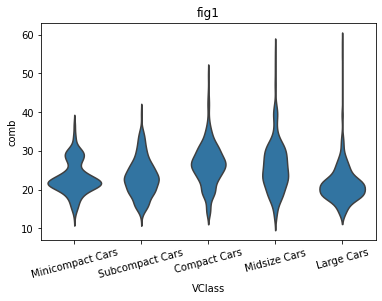

In [ ]:
sb.violinplot(data = newfuel_econ,x='VClass',y = 'comb',inner=None ,color=base_color);
plt.xticks(rotation = 15);
plt.title('fig1');


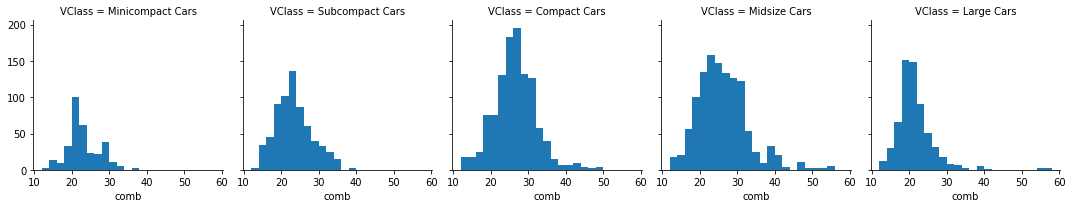

In [ ]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = newfuel_econ, col = 'VClass')
g.map(plt.hist, "comb", bins = bins);


**Answer5:** we can see that there isn't a clear relationship between the fuel efficiency and the car size * the median of the minicompact almost the same of the large cars but we can also see that the begger the cal the more we can see outliers in it's plot so there is a chance
that the larger the car the more efficiency it gets but this is for a small number of the cars 

**6- What is the relationship between the size of a car and the size of its engine?**

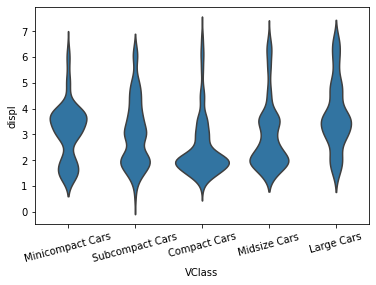

In [ ]:
sb.violinplot(data = newfuel_econ,x='VClass',y = 'displ',inner=None ,color=base_color);
plt.xticks(rotation = 15);

** the violinblot isn't showing much here, we can add the median and the quartiles in it but it will be better if we use the boxplot

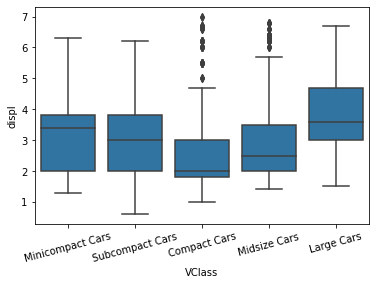

In [ ]:
sb.boxplot(data = newfuel_econ,x='VClass',y = 'displ',color=base_color);
plt.xticks(rotation = 15);

**Answer6:** we can see here that the large cars has bigger engine but that is not a rule or a relationship because we can see that the minicompact cars has close value  to the large cars and the subcompact cars has bigger engine then the compact and bigger even of the minisize cars  **So in general the relationship here is not clear maybe we can tell that there is no relationship at all  ***

**7-what is the relationshipe between the car size and the type of the car"automatic vs manual"**

In [ ]:
newfuel_econ['type'] = newfuel_econ.trans.apply(lambda x : x.split()[0])
newfuel_econ['type'].unique()

array(['Automatic', 'Manual'], dtype=object)

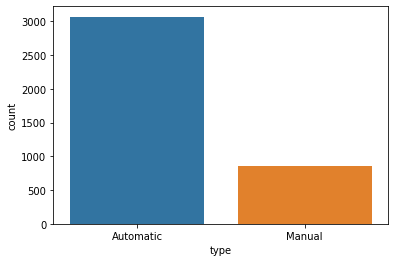

In [ ]:
sb.countplot(data = newfuel_econ,x = 'type');

So the common type is automatic let's discover the relatin between them now

In [ ]:
count = newfuel_econ.groupby(['type','VClass']).size()
count = count.reset_index(name = 'count')
count = count.pivot_table(index = 'VClass',columns='type',values='count')
count

type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


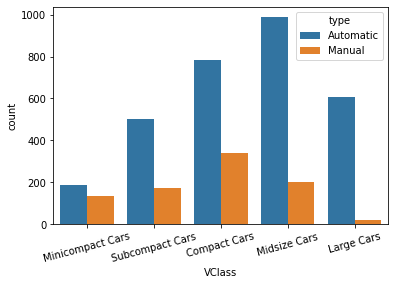

In [ ]:
sb.countplot(data = newfuel_econ,x = 'VClass',hue='type');
plt.xticks(rotation = 15);

**Answer7:** we can see that the large cars almost no manual on the ather hand the minicompact cars has the highest ratio of manual/automatic and we can see the relation more clear in the heatmap below

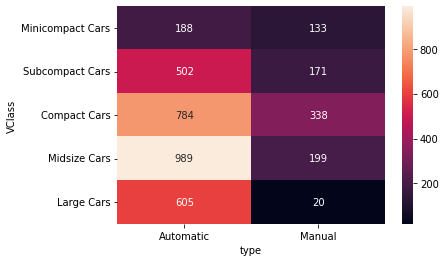

In [ ]:
sb.heatmap(count,annot=True,fmt='d')

**8- explore whether or not there differences in recommended fuel type depending on the vehicle class**

In [ ]:
newfuel_econ.fuelType.unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel',
       'Midgrade Gasoline', 'Natural Gas'], dtype=object)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

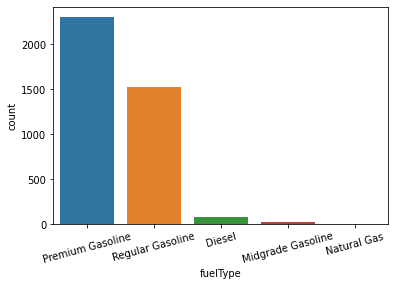

In [ ]:
sb.countplot(data = newfuel_econ,x = 'fuelType');
plt.xticks(rotation = 15)

we can see that the main types here are Premium Gasoline and Regular Gasoline so will focus on these two

In [ ]:
newfuel_econ = newfuel_econ[newfuel_econ['fuelType'].isin (['Premium Gasoline', 'Regular Gasoline'])]


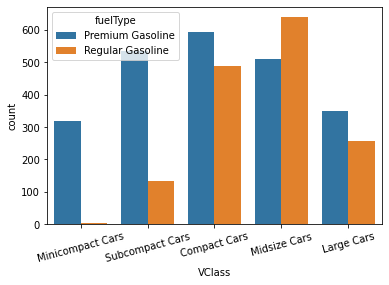

In [ ]:
sb.countplot(data = newfuel_econ,x = 'VClass',hue='fuelType');
plt.xticks(rotation = 15);

**Answer8:** we can see here that in minicompact cars and subcompact cars usualy the fuel type is premium and not regular fuel but in the rest there is a close ratio so we can't tell to use any type

**9 - What is  the relationshipe the engine size and type of the car  have with the *fuel_eff ***

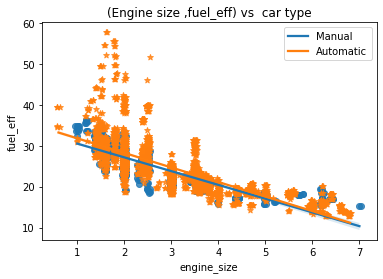

In [ ]:
markers = [['Manual','o'],['Automatic','*']]
for t,marker in markers:
  fue_type = newfuel_econ.loc[newfuel_econ['type'] == t]
  sb.regplot(data = fue_type,x='displ',y = 'comb',x_jitter=0.04,marker = marker);
plt.title('(Engine size ,fuel_eff) vs  car type');
plt.legend(['Manual','Automatic']);
plt.ylabel('fuel_eff');
plt.xlabel('engine_size');

**Answer9 :** there is alot of overlap but we can see here that the automatic cars with small engine have the highiest fuell eff

In [ ]:
#g = sb.FacetGrid(data=fuel_econ,hue = 'VClass',size =4,palette='viridis_r' ,aspect=1.5)
#g= g.map(sb.regplot,'displ','comb',fit_reg = False,x_jitter=0.04)
#g.add_legend()
#plt.ylabel('fuel_eff');
#plt.xlabel('engine_size');

**10 - Are the cars with highf fuel_eff using Co2 more or less the cars with low fuel_eff ***

> Indented block



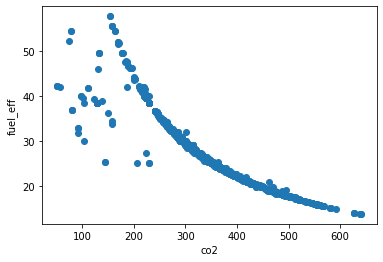

In [ ]:
plt.scatter(data=temp_fuel_econ,x='co2',y='comb');
plt.xlabel('co2 footprint ');
plt.ylabel('fuel_eff');



**Answer 10 :** there is a clear negative relation between CO2 footprint  and fuel_eff so if you pro environment you should buya car  with high fuel_eff 

**11 - reccommend a brand for that using less co2 footprint and also have a high fuel_eff**

In [ ]:
aa = newfuel_econ['make'].value_counts() 
aa.index

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'MINI', 'Audi',
       'Hyundai', 'Volkswagen', 'Lexus', 'Dodge', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda', 'Nissan', 'Buick', 'Subaru',
       'Lincoln', 'Chrysler', 'Volvo', 'Acura', 'Bentley', 'Mitsubishi',
       'Rolls-Royce', 'Maserati', 'Scion', 'Fiat', 'Ferrari', 'Genesis',
       'Aston Martin', 'Suzuki', 'Roush Performance', 'Lotus', 'Alfa Romeo',
       'Karma'],
      dtype='object')

In [ ]:
temp_fuel_econ = newfuel_econ.copy()
l = ['Nissan', 'Buick', 'Subaru','BMW', 'Mercedes-Benz',
       'Lincoln', 'Chrysler', 'Volvo', 'Acura', 'Bentley', 'Mitsubishi',
       'Rolls-Royce', 'Maserati', 'Scion', 'Fiat', 'Ferrari', 'Genesis',
       'Aston Martin', 'Suzuki', 'Roush Performance', 'Lotus', 'Alfa Romeo',
       'Karma'] # brands that have less than 80 cars in the dataset 
temp_fuel_econ.drop(temp_fuel_econ[temp_fuel_econ['make'].isin(l)].index, inplace=True)
temp_fuel_econ['make'].unique()

array(['Volkswagen', 'Chevrolet', 'Lexus', 'Hyundai', 'Mazda', 'Ford',
       'Kia', 'Porsche', 'Audi', 'Cadillac', 'Dodge', 'Infiniti',
       'Jaguar', 'MINI', 'Toyota', 'Honda'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


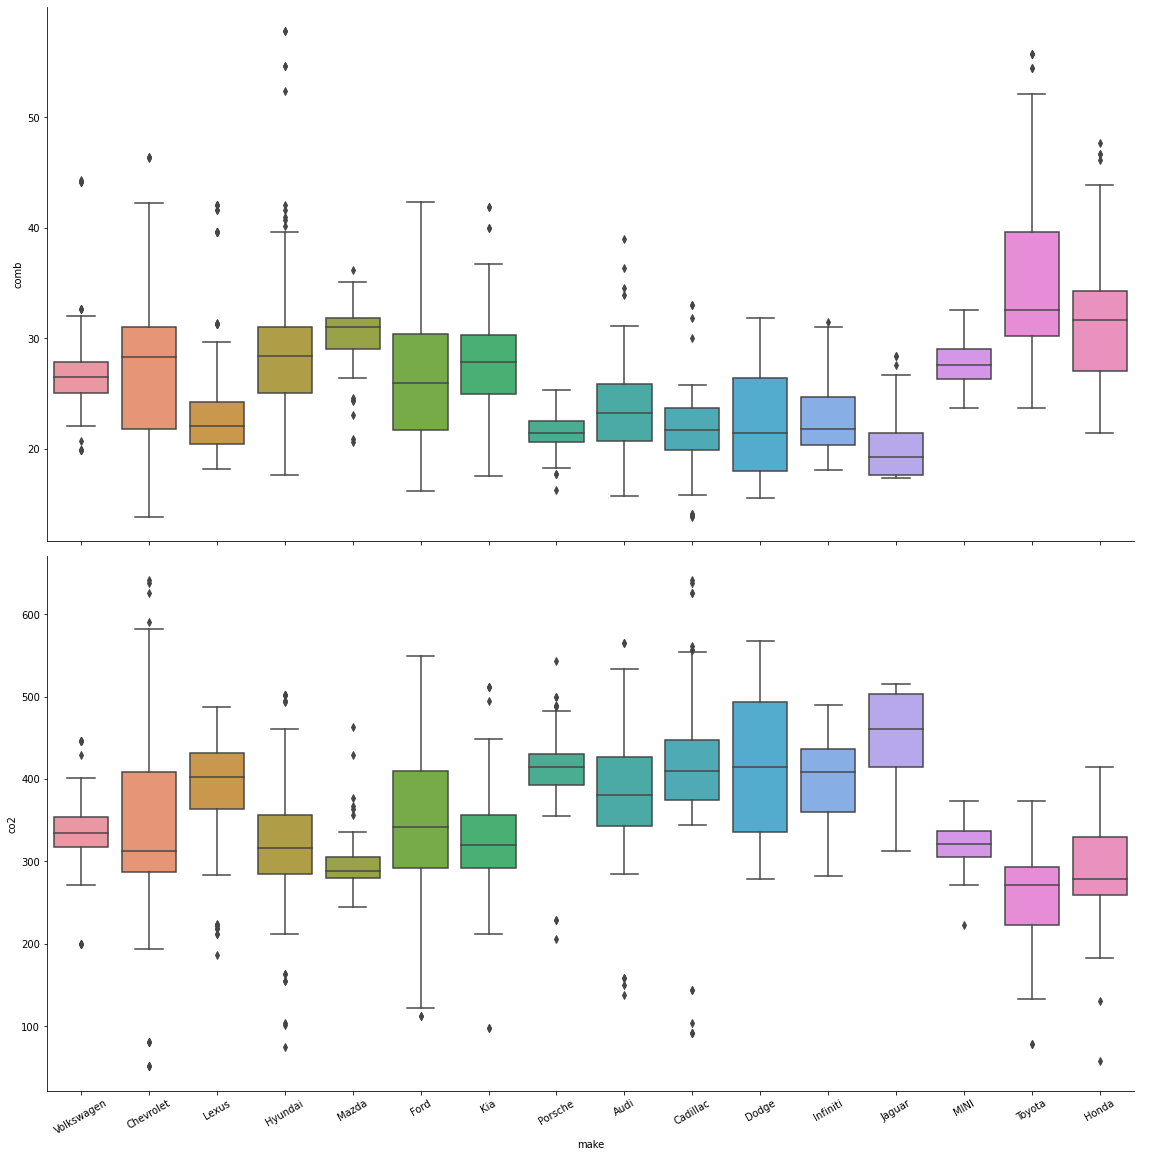

In [ ]:
g = sb.PairGrid(data=temp_fuel_econ,x_vars  = 'make',y_vars =['comb','co2'],size = 8 ,aspect=2)
g= g.map(sb.boxplot)
g.add_legend()
plt.xticks(rotation = 30);

**Answer 11 :** We can see toyota and honda is the most fuel_eff between the brands and also   the using least  co2 footprint also but jaguar have  the least fuel_eff and the most using of co2  and that make sense becase the negative relation between the co2 and fuel_eff as i shown befor.

**So if you want a car that using lessc co2 footprint and with high fuel_eff you should look into toyota and honda and don't mconsider buying jaguar**